# 1- Data extraction and Processing
In this first step, we will produce a csv file that contains the paths of the text files, the classes and the extracted text.

In [1]:
import codecs
import csv
import re
import nltk
import warnings
warnings.filterwarnings("ignore")

def lines_to_line(path):
    """ input : path of a text file
        output : extracted text after some preprocessing """
    file = codecs.open(path, 'r', "utf-8")
    lines = file.readlines()
    text = " ".join([line.strip() for line in lines])
    # remove stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    text = " ".join([word.lower() for word in text.split() if word.lower() not in stopwords])
    # remove some special and control characters using regular expression
    regex = re.compile(r'[\n|\r|\t|$|£|&|(|*|%|@|)|"|“|,|:|.|;|+|?|!|~|{|}|§|#|"]')
    text = regex.sub(" ", text)
    # remove words with less than four characters
    text_recovered = " ".join([word for word in text.split() if len(word) >= 4])
    return text_recovered


def extract_text(img_csv, txt_csv):
    """ inputs : two csv files : source and target
        the first contains the image paths and their classes
        the seconde is the csv file produced that contains
        the text paths, the classes and the extracted text
        outputs : list of empty files, length of the list """
    csvinput = codecs.open(img_csv,'r', "utf-8")
    csvoutput = codecs.open(txt_csv, 'w', "utf-8")
    writer = csv.writer(csvoutput, delimiter='\t')
    reader = csv.reader(csvinput, delimiter=',')
    # save the paths of the empty text files
    NAN = []
    # loop over the input csv file
    for i, row in enumerate(reader):
        # change the image path to a text path
        row[0] = row[0].replace("jpg", "txt")
        # create the headers
        if i == 0:
            writer.writerow(["txt_path", row[1], "text"])
        # extract the text
        else:
            text = lines_to_line("data/" + row[0])
            # if missing values are detected
            if text == "":
                NAN.append(row[0])
            # create the csv file with the no empty extrcated values
            else:
                writer.writerow([row[0], row[1], text])
    csvinput.close()
    csvoutput.close()
    return NAN, len(NAN)
missing_data, l = extract_text("Tobacco3482.csv", "Tobacco_text.csv")

In [2]:
print("Paths of the empty files : ")
for p in missing_data:
    print(p)
print("Nomber of empty files : %d" %l)

Paths of the empty files : 
Advertisement/2050834062.txt
Advertisement/2065199983_9984.txt
Advertisement/2072998094.txt
Advertisement/501947737_501947738.txt
Advertisement/502610513+-0516.txt
Advertisement/512725630.txt
Advertisement/517508450+-8453.txt
Advertisement/521150892+-0895.txt
Letter/512753125.txt
Note/00093561.txt
Note/03016504.txt
Note/03563613.txt
Note/1000240946.txt
Note/1000261527.txt
Note/1003188772.txt
Note/1003286334.txt
Note/10226038.txt
Note/10384492.txt
Note/2021500947.txt
Note/2021655168.txt
Note/2029146130.txt
Note/2029237593.txt
Note/2031018769.txt
Note/2043246073.txt
Note/2048858141.txt
Note/2063181986.txt
Note/2070386760.txt
Note/2082693424a.txt
Note/50028588.txt
Note/50054229.txt
Note/50488503-8503.txt
Note/80191212_80191213.txt
Nomber of empty files : 32


# 2- Data Exploration

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# create pandas dataframe
df = pd.read_csv("Tobacco_text.csv", sep="\t")
# display the dimensions
print("----------------- Shapes : ----------------")
print(df.shape)

----------------- Shapes : ----------------
(3450, 3)


In [4]:
# display the ten first rows
df.loc[0 : 10,:]

,txt_path,label,text
0,Advertisement/0000136188.txt,Advertisement,mpertant sesiye teaetered cabiieess baely does...
1,Advertisement/0000435350.txt,Advertisement,fitm m66400 7127 kools cigarettes taste good c...
2,Advertisement/0000556056.txt,Advertisement,vending operators columns worth per_machine ye...
3,Advertisement/0030048095.txt,Advertisement,march tersrearep ills weisais cere tars ined n...
4,Advertisement/0030048989.txt,Advertisement,spend milder moment raleigh special treatment ...
5,Advertisement/0030049569.txt,Advertisement,onrel ules tales lowered lots taste compare ta...
6,Advertisement/03496270.txt,Advertisement,‘with talk smoking decided either quit smoke
7,Advertisement/03567810.txt,Advertisement,buiseaut --uoanyf sanosdun liyl adpuloy load 9...
8,Advertisement/03722789.txt,Advertisement,that’s newspapel that's said body else caught ...
9,Advertisement/04102204.txt,Advertisement,brown william marfan frabee csa/supermarkets 1...


In [5]:
# check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3450 entries, 0 to 3449
Data columns (total 3 columns):
txt_path    3450 non-null object
label       3450 non-null object
text        3450 non-null object
dtypes: object(3)
memory usage: 80.9+ KB


As we can see, from the information above, there is no missing values. Now let's compute and plot the frequency of the most common words :

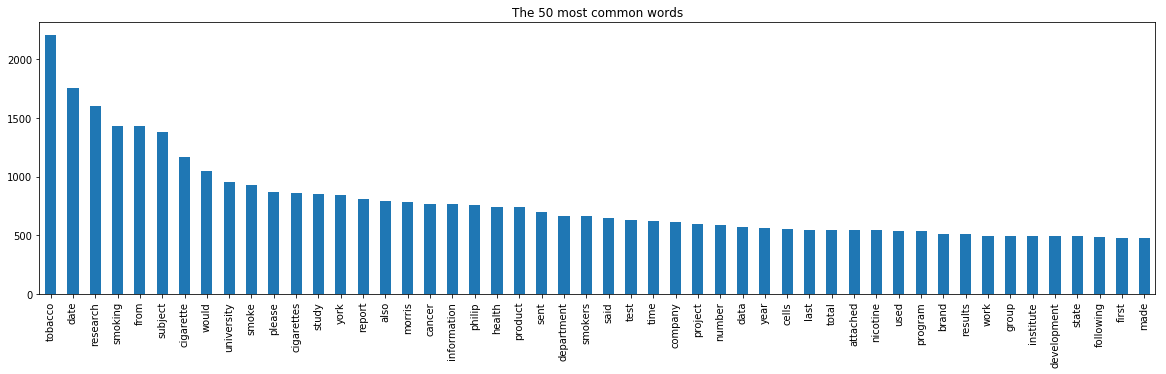

In [6]:
# compute word frequencies
f_words = df.text.str.split(expand=True).stack().value_counts()
fig = plt.figure(figsize=(20,5))
f_words[:50].plot(kind='bar')
plt.title("The 50 most common words")
plt.show()

As we can see from the histogram, our documents are dealing, mainly, with tobacco as a topic.<br>
Now let's visualize the distribution of our classes :

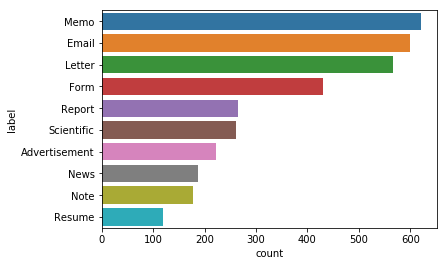

In [7]:
# Plot the frequencies of the classes in descending order
sns.countplot(data = df, y ='label', order = df['label'].value_counts().index)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
# Split the dataset in a stratified way
X_train, X_test, Y_train, Y_test = train_test_split(df["text"],
                                                    df["label"],
                                                    stratify=df["label"],
                                                    test_size=0.2,
                                                    random_state = 0)
# Split the train set to train and dev sets 
x_train, x_dev, y_train, y_dev = train_test_split(X_train, Y_train,
                                                  stratify=Y_train,
                                                  test_size=0.25, random_state = 0)

Let's verify that our split procedure is done in a stratified way

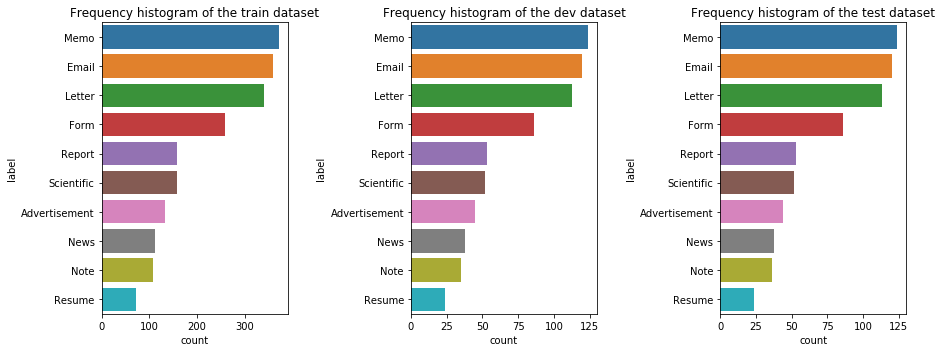

In [9]:
# convert pandas series to dataframes
df_y_train = pd.Series.to_frame(y_train)
df_y_dev = pd.Series.to_frame(y_dev)
df_y_test = pd.Series.to_frame(Y_test)
# plots
fig, ax = plt.subplots(1, 3, figsize=(13,5))
sns.countplot(data = df_y_train, y ='label',\
              order = df_y_train['label'].value_counts().index, ax = ax[0])
ax[0].set(title = "Frequency histogram of the train dataset")
sns.countplot(data = df_y_dev, y ='label',\
              order = df_y_dev['label'].value_counts().index, ax = ax[1])
ax[1].set(title = "Frequency histogram of the dev dataset")
sns.countplot(data = df_y_test, y ='label',\
              order = df_y_test['label'].value_counts().index, ax = ax[2])
ax[2].set(title = "Frequency histogram of the test dataset")
fig.tight_layout()
plt.show()

# 3- Building Models
Let's start with building features and train our first Naive Bayes classifier
## 3.1- Bag-of-Words
Before builiding our features, we need to specify their maximum number. One way to do this is by observing the word frequency histogram produced above. As we can see, we can build vectors by taking the maximum number of features from the range(500, 3000). Now let's search for an adequate value according to some model :

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

Max_features = [500, 1000, 1500, 2000, 2200, 2400, 2600, 3000]
for f in Max_features:
    # Create document vectors
    vectorizer = CountVectorizer(max_features=f)
    vectorizer.fit(x_train)
    X_train_counts = vectorizer.transform(x_train)
    # train a Naive Bayes classifier
    clf = MultinomialNB().fit(X_train_counts, y_train)
    # train a linear svm
    clf_svm = LinearSVC(multi_class="crammer_singer").fit(X_train_counts, y_train)
    # Scores of 5-folds cross validation
    scores = cross_val_score(clf, X_train_counts, y_train, cv=5)
    print("---------- max_features = " + str(f) + " ----------------")
    print("------- Naive Bayes Classifier --------")
    print("Mean Accuracy : %.2f" %scores.mean())
    print("Standard deviation : %.2f" %scores.std())
    scores = cross_val_score(clf_svm, X_train_counts, y_train, cv=5)
    print("------- Linear SVM --------")
    print("Mean Accuracy : %.2f" %scores.mean())
    print("Standard deviation : %.2f" %scores.std())

---------- max_features = 500 ----------------
------- Naive Bayes Classifier --------
Mean Accuracy : 0.67
Standard deviation : 0.02
------- Linear SVM --------
Mean Accuracy : 0.68
Standard deviation : 0.02
---------- max_features = 1000 ----------------
------- Naive Bayes Classifier --------
Mean Accuracy : 0.69
Standard deviation : 0.02
------- Linear SVM --------
Mean Accuracy : 0.69
Standard deviation : 0.02
---------- max_features = 1500 ----------------
------- Naive Bayes Classifier --------
Mean Accuracy : 0.70
Standard deviation : 0.02
------- Linear SVM --------
Mean Accuracy : 0.70
Standard deviation : 0.01
---------- max_features = 2000 ----------------
------- Naive Bayes Classifier --------
Mean Accuracy : 0.70
Standard deviation : 0.03
------- Linear SVM --------
Mean Accuracy : 0.71
Standard deviation : 0.02
---------- max_features = 2200 ----------------
------- Naive Bayes Classifier --------
Mean Accuracy : 0.70
Standard deviation : 0.02
------- Linear SVM -------

According to the two classifiers, 2600 would be an appropriate value of maximum features. Now, let's vectorize our model using this value and compute the accuracy on the dev dataset :

In [11]:
vectorizer = CountVectorizer(max_features=2600)
vectorizer.fit(x_train)
X_train_counts = vectorizer.transform(x_train)
X_dev_counts = vectorizer.transform(x_dev)
clf_vect = MultinomialNB().fit(X_train_counts, y_train)
clf_svm = LinearSVC(multi_class="crammer_singer").fit(X_train_counts, y_train)
print("Accuracy Naive Bayes : %.2f" %clf_vect.score(X_dev_counts, y_dev))
print("Accuracy SVM : %.2f" %clf_svm.score(X_dev_counts, y_dev))

Accuracy Naive Bayes : 0.71
Accuracy SVM : 0.71


## 3.2- TF-IDF representation
Let's reproduce the same procedure, but instead of using *CountVectorizer* only, we will add a TF-IDF representation and inject more complexity to our modelization :

In [12]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neural_network import MLPClassifier

# Create document vectors
vectorizer = CountVectorizer(max_features=2600)
vectorizer.fit(x_train)
X_train_counts = vectorizer.transform(x_train)
X_dev_counts = vectorizer.transform(x_dev)
tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_dev_tf = tf_transformer.transform(X_dev_counts)
# train a Naive Bayes classifier
clf_tf = MultinomialNB().fit(X_train_tf, y_train)
# train a linear svm
clf_svm_tf = LinearSVC(multi_class="crammer_singer").fit(X_train_tf, y_train)
# train MLP
clf_mlp_tf = MLPClassifier().fit(X_train_tf, y_train)
# scores
scores_tf = cross_val_score(clf_tf, X_train_tf, y_train, cv=5)
scores_svm_tf = cross_val_score(clf_svm_tf, X_train_tf, y_train, cv=5)
scores_mlp_tf = cross_val_score(clf_mlp_tf, X_train_tf, y_train, cv=5)
# Mean Accuracies
print("Mean Accuracy Naive Bayes : %.2f" %scores_tf.mean())
print("Mean Accuracy SVM : %.2f" %scores_svm_tf.mean())
print("Mean Accuracy MLP : %.2f" %scores_mlp_tf.mean())
print("_________ Accuracies on the dev set -------------")
print("Naive Bayes : %.2f" %clf_tf.score(X_dev_tf, y_dev))
print("SVM : %.2f" %clf_svm_tf.score(X_dev_tf, y_dev))
print("MLP : %.2f" %clf_mlp_tf.score(X_dev_tf, y_dev))

Mean Accuracy Naive Bayes : 0.65
Mean Accuracy SVM : 0.75
Mean Accuracy MLP : 0.75
_________ Accuracies on the dev set -------------
Naive Bayes : 0.66
SVM : 0.77
MLP : 0.74


## 3.2- Error analysis
The classification report and the confusion matrix will provide us more details about the behaviour of our classifiers :

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("----------------------- TF-IDF representation ----------------------------")
print("----------------------- Linear SVM ----------------------------")
y_pred = clf_svm_tf.predict(X_dev_tf)
print("Classification Report")
print(classification_report(y_dev, y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_dev, y_pred))
print("----------------------- MLP ----------------------------")
y_pred = clf_mlp_tf.predict(X_dev_tf)
print("Classification Report")
print(classification_report(y_dev, y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_dev, y_pred))

----------------------- TF-IDF representation ----------------------------
----------------------- Linear SVM ----------------------------
Classification Report
               precision    recall  f1-score   support

Advertisement       0.79      0.67      0.72        45
        Email       0.93      0.95      0.94       120
         Form       0.77      0.85      0.81        86
       Letter       0.75      0.70      0.72       113
         Memo       0.79      0.85      0.82       124
         News       0.80      0.84      0.82        38
         Note       0.58      0.54      0.56        35
       Report       0.54      0.47      0.51        53
       Resume       0.92      1.00      0.96        24
   Scientific       0.61      0.60      0.60        52

  avg / total       0.77      0.77      0.77       690

Confusion Matrix
[[ 30   0   2   0   2   3   8   0   0   0]
 [  0 114   0   2   4   0   0   0   0   0]
 [  1   1  73   3   1   0   2   1   1   3]
 [  4   2   3  79  12   1   0 

By observing the classification reports and the confusion matrices of the Linear SVM classifier and the MLP classifier ; both manifest nearly the same behaviour. For instance, both the models are not confused about the *Resume* observations ; on the contrary, they are so confused about the *Report* observations.<br>
In order to deal with just one model, one shall choose the one with better performances and less complexity.<br>
Now, we will continue our journey with the Linear SVM model.

## 3.3- Bias-Variance
To get sense about the bias-variance issue, let's plot the learning curve and see if our SVM classifier can do better with more data instances :

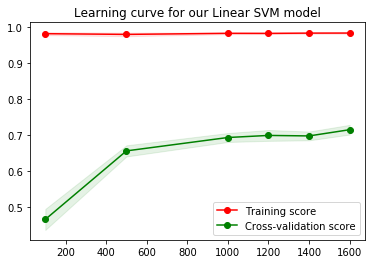

In [14]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, valid_scores = learning_curve(LinearSVC(multi_class="crammer_singer"),\
                      X_train_counts, y_train, train_sizes=[100, 500, 1000, 1200, 1400, 1600], cv=5)

# train_sizes, train_scores, valid_scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.title("Learning curve for our Linear SVM model")
plt.legend(loc="best")
plt.show()

As the curve show, adding more observations can help our model to obtain better performance in generalization.<br>
The next step is to optimize the hyperparameters using a Grid Search Cross-Validation method.

## 3.4- Hyperparameters optimization

In [15]:
from sklearn.model_selection import GridSearchCV
hyperparameters = {'penalty': ["l1","l2"], \
              "loss" : ["squared_hinge", "hinge"],\
                "tol" : [1e-3, 1e-4, 1e-5],
                "C" : [1e-2, 1e-1, 0.5, 1, 5, 10, 50, 100],
                "max_iter" : [1000, 2000, 3000] }
clf_grid = GridSearchCV(LinearSVC(multi_class="crammer_singer"),\
                        hyperparameters, n_jobs=2, verbose=3)
clf_grid.fit(X_train_tf, y_train)
print(clf_grid.best_params_)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    6.1s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:   17.7s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:  1.0min
[Parallel(n_jobs=2)]: Done 508 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  3.3min
[Parallel(n_jobs=2)]: Done 864 out of 864 | elapsed:  3.8min finished


{'C': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'penalty': 'l1', 'tol': 0.001}


Now, we will build our model according to the winning configuration, train it on the whole training dataset and compute our last score on the test dataset :

In [16]:
vectorizer = CountVectorizer(max_features=2600)
vectorizer.fit(X_train)
X_train_counts = vectorizer.transform(X_train)
X_test_counts = vectorizer.transform(X_test)
tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_test_tf = tf_transformer.transform(X_test_counts)
final_clf_svm_tf = LinearSVC(multi_class="crammer_singer", \
                            C=1, loss='squared_hinge',\
                             max_iter= 1000, penalty='l1',\
                             tol= 0.001).fit(X_train_tf, Y_train)
print("Accuracy on the test dataset = %.2f" %final_clf_svm_tf.score(X_test_tf, Y_test))
y_pred = final_clf_svm_tf.predict(X_test_tf)
print("Classification Report")
print(classification_report(Y_test, y_pred))
print("Confusion Matrix")
print(confusion_matrix(Y_test, y_pred))

Accuracy on the test dataset = 0.76
Classification Report
               precision    recall  f1-score   support

Advertisement       0.87      0.61      0.72        44
        Email       0.93      0.98      0.96       120
         Form       0.84      0.87      0.86        86
       Letter       0.75      0.73      0.74       113
         Memo       0.75      0.85      0.80       124
         News       0.67      0.63      0.65        38
         Note       0.45      0.50      0.47        36
       Report       0.43      0.36      0.39        53
       Resume       0.96      1.00      0.98        24
   Scientific       0.70      0.63      0.67        52

  avg / total       0.76      0.76      0.76       690

Confusion Matrix
[[ 27   0   2   1   1   0  10   3   0   0]
 [  0 118   0   1   1   0   0   0   0   0]
 [  0   0  75   1   4   0   4   1   0   1]
 [  0   2   0  83  15   1   0   8   0   4]
 [  1   3   0   7 106   1   0   3   0   3]
 [  1   0   2   2   0  24   5   2   0   2]
 [  

## 3.5- Neural Network Classifier
We will now perform our classification using a convolutional neural network :

In [17]:
import ast
import os
from nn_utils import TrainingHistory
from keras.layers import Dense, Embedding, Input
from keras.layers import GRU, Dropout, MaxPooling1D, Conv1D, Flatten
from keras.models import Model
import numpy as np
import itertools
from keras.utils import np_utils
from sklearn.metrics import (classification_report, 
                             precision_recall_fscore_support, 
                             accuracy_score)

from keras.preprocessing import text, sequence


Using TensorFlow backend.


In [18]:
# Model parameters
MAX_FEATURES = 10000
MAX_TEXT_LENGTH = 1024
EMBED_SIZE  = 300
BATCH_SIZE = 16
EPOCHS = 10
VALIDATION_SPLIT = 0.1

In [19]:
def get_train_test(train_raw_text, test_raw_text):
    
    tokenizer = text.Tokenizer(num_words=MAX_FEATURES)

    tokenizer.fit_on_texts(list(train_raw_text))
    train_tokenized = tokenizer.texts_to_sequences(train_raw_text)
    test_tokenized = tokenizer.texts_to_sequences(test_raw_text)
    return sequence.pad_sequences(train_tokenized, maxlen=MAX_TEXT_LENGTH), \
           sequence.pad_sequences(test_tokenized, maxlen=MAX_TEXT_LENGTH)

def get_model():

    inputs = Input(shape=(MAX_TEXT_LENGTH,))
    model = Embedding(input_dim=MAX_FEATURES,\
                      output_dim=EMBED_SIZE)(inputs)
    model = Dropout(0.5)(model)
    model = Conv1D(32, (2,), padding='same', activation='relu')(model)
    model = MaxPooling1D(pool_size=2)(model)
    model = Flatten()(model)
    model = Dense(10, activation="softmax")(model)
    model = Model(inputs=inputs, outputs=model)
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model


def train_fit_predict(model, x_train, x_test, y, history):
    
    model.fit(x_train, y,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS, verbose=1,
              validation_split=VALIDATION_SPLIT)

    return model.predict(x_test)


# Get the list of different classes
CLASSES_LIST = np.unique(Y_train)
n_out = len(CLASSES_LIST)
print(CLASSES_LIST)

# Convert clas string to index
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(CLASSES_LIST)
y_train = le.transform(Y_train) 
y_test = le.transform(Y_test) 
train_y_cat = np_utils.to_categorical(y_train, n_out)

# get the textual data in the correct format for NN
x_vec_train, x_vec_test = get_train_test(X_train, X_test)
print(len(x_vec_train), len(x_vec_test))

# define the NN topology
model = get_model()

# Define training procedure
history = TrainingHistory(x_vec_test, y_test, CLASSES_LIST)

# Train and predict
y_predicted = train_fit_predict(model, x_vec_train, x_vec_test, train_y_cat, history).argmax(1)


print("Test Accuracy:", accuracy_score(y_test, y_predicted))

p, r, f1, s = precision_recall_fscore_support(y_test, y_predicted, 
                                              average='micro',
                                              labels=[x for x in 
                                                      np.unique(y_train) 
                                                      if x not in ['CSDECMOTV']])

print('p r f1 %.1f %.2f %.3f' % (np.average(p, weights=s)*100.0, 
                                 np.average(r, weights=s)*100.0, 
                                 np.average(f1, weights=s)*100.0))


print(classification_report(y_test, y_predicted, labels=[x for x in 
                                                       np.unique(y_train) 
                                                       if x not in ['CSDECMOTV']]))

['Advertisement' 'Email' 'Form' 'Letter' 'Memo' 'News' 'Note' 'Report'
 'Resume' 'Scientific']
2760 690
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1024)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1024, 300)         3000000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024, 300)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1024, 32)          19232     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 512, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
______________________________________

The results achieved are reasonably good comparing to the size of our dataset. Indeed, to do better, our neural network needs more data because it performs two successive tasks : features learning and classification.